In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
OPENAI_API_KEY='YOUR OPENAI KEY'

#Generate q and a pairs from bioninja data

In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Arunadiss/main/scrape_bioninja/chunk_df.csv")
df

,Topic Number,Subtopic Number,Chunk
0,1,1.1,1.1 Introduction to Cells\nCell theory:\nUnder...
1,1,1.1,1.1 Introduction to Cells\nCell theory:\nAppli...
2,1,1.1,1.1 Introduction to Cells\nFunctions of life:\...
3,1,1.1,1.1 Introduction to Cells\nFunctions of life:\...
4,1,1.1,1.1 Introduction to Cells\nSa vol ratio:\nUnd...
...,...,...,...
688,11,11.4,11.4 Sexual Reproduction\nPlacenta:\nUnderstan...
689,11,11.4,11.4 Sexual Reproduction\nBirth process:\nUnde...
690,11,11.4,11.4 Sexual Reproduction\nGestation periods:\n...
691,11,11.4,11.4 Sexual Reproduction\nSemen production:\nS...


I want to generate question and answer pairs from each chunk. However, I want to generate more question and answer pairs depending on the size of chunk. To get an understanding of the distribution of chunk sizes in terms of characters we execute the following.

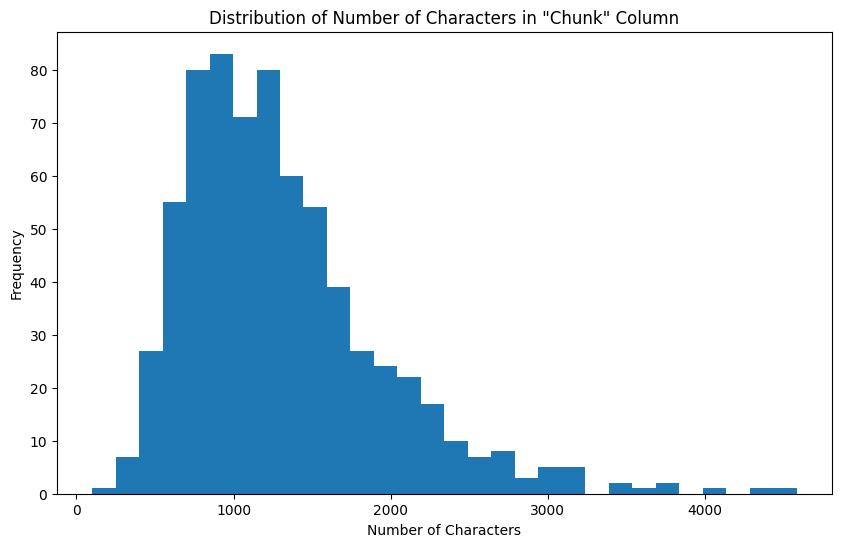

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['Character Count'] = df['Chunk'].astype(str).apply(len)

# Display the distribution of character counts
plt.figure(figsize=(10, 6))
df['Character Count'].hist(bins=30)
plt.title('Distribution of Number of Characters in "Chunk" Column')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [ ]:
!pip install openai tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.3/268.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI
client=OpenAI(api_key=OPENAI_API_KEY)

In [ ]:
import os
from openai import OpenAI
from tqdm import tqdm

def generate_q_and_a_pairs(content, number_of_pairs=2):
    """
    Generate question and answer pairs using the OpenAI API based on the given content.

    Args:
        content (str): The content from which to generate Q&A pairs.
        number_of_pairs (int): The number of Q&A pairs to generate.

    Returns:
        str: The generated Q&A pairs or an error message.
    """
    prompt=f"Content: {content}\n\nGenerate {number_of_pairs} question and answer pairs using solely the information provided in the content. Structure each pair with 'Q:' followed by the question, then 'A:' followed by the answer. Separate each Q&A pair with '###'. Ensure the Q&A pairs cover the entirety of the content given."

    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {
                    "role": "system",
                    "content": "You are a Question and Answer pair generator from a given body of content."
                },
                {
                    "role": "user",
                    "content": prompt
                }
            ],
            temperature=0.7,
            max_tokens=2000,
            top_p=1
        )
        complete_response = response.choices[0].message.content
        return complete_response
    except Exception as e:
        return f"Error generating response: {e}"




In [ ]:
content=df['Chunk'][55]
print(len(content))
content

1949


"1.5 The Origin of Cells\nOrigins of life:\nThe initial formation of primitive living structures (protocells) is thought to require a specific supporting chemical environment Early Earth had a chemically-reducing atmosphere, which when exposed to energy in various forms (heat, electrical discharge, etc.) produced a variety of simple organic compounds (monomers) These compounds accumulated in a molecular\xa0‘soup’, allowing for the formation of more complex compounds (polymers)  There are a number of locations posited as providing suitable conditions for the formation of a concentrated chemical soup, including volcanoes, hydrothermal vents, shorelines and outer space  1. Volcanoes The gas composition of volcanic eruptions contain high levels of fixed nitrogen and other raw materials which could be used for primitive metabolism Intensive volcanic activity could also generate sufficient thermal energy to catalyse the formation of organic molecules  2. Hydrothermal Vents Hydrothermal vents

In [ ]:
example= generate_q_and_a_pairs(content,5)
print(len(example))
print(example)

2195
Q: What is the general theory around the initial formation of primitive living structures or protocells?
A: The initial formation of protocells is thought to require a specific supporting chemical environment. Early Earth had a chemically-reducing atmosphere, which when exposed to energy in various forms produced a variety of simple organic compounds. These compounds accumulated in a molecular ‘soup’, allowing for the formation of more complex compounds. 

###
Q: What are some of the locations posited as providing suitable conditions for the formation of a concentrated chemical soup?
A: The locations that could provide suitable conditions for the formation of a concentrated chemical soup include volcanoes, hydrothermal vents, shorelines, and outer space.

###
Q: How could volcanoes and hydrothermal vents have contributed to the formation of organic molecules?
A: Volcanoes could contribute through their gas composition that contains high levels of fixed nitrogen and other raw mater

Now we must apply the function to every element in df['Chunk']. Howver, I want the number of Q and A pairs to be dependent on the size of the chunk. Hence, we make this function that is based on the distribution of chunk sizes above.

In [ ]:
def determine_pair_count(character_count):
    if character_count<= 500:
        return 2
    elif 500 < character_count<= 1000:
        return 3
    elif 1000 < character_count <= 1500:
        return 4
    elif 1500 < character_count <= 2000:
        return 5
    elif 2000 < character_count <= 3000:
        return 6
    else:
        return 7


In [ ]:
df['Q&A Pairs'] = df['Chunk'].apply(lambda x: generate_q_and_a_pairs(x, determine_pair_count(len(x))))

In [ ]:
import pandas as pd
from tqdm.auto import tqdm

# Initialize the 'Q&A Pairs' column with NaNs
df['Q&A Pairs'] = pd.NaT

# Create a progress bar with tqdm and iterate over the DataFrame
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Generating Q&A Pairs"):
    # Apply the function to generate Q&A pairs
    qa_pairs = generate_q_and_a_pairs(row['Chunk'], determine_pair_count(len(row['Chunk'])))

    # Update the 'Q&A Pairs' for the current row
    df.at[index, 'Q&A Pairs'] = qa_pairs

    # Save the DataFrame after each update to avoid losing progress
    df.to_csv("/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/qa_dataset_progress.csv", index=False)

df.to_csv("/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/qa_dataset_final.csv", index=False)


Generating Q&A Pairs:   0%|          | 0/693 [00:00<?, ?it/s]

In [ ]:
df

,Topic Number,Subtopic Number,Chunk,Character Count,Q&A Pairs
0,1,1.1,1.1 Introduction to Cells\nCell theory:\nUnder...,400,Q: What does the cell theory state about livin...
1,1,1.1,1.1 Introduction to Cells\nCell theory:\nAppli...,1071,Q: What is the cell theory application that qu...
2,1,1.1,1.1 Introduction to Cells\nFunctions of life:\...,905,Q: What does it mean when it's said that organ...
3,1,1.1,1.1 Introduction to Cells\nFunctions of life:\...,1600,Q: What are Paramecia and how do they carry ou...
4,1,1.1,1.1 Introduction to Cells\nSa vol ratio:\nUnd...,1323,Q: What is the significance of the surface are...
...,...,...,...,...,...
688,11,11.4,11.4 Sexual Reproduction\nPlacenta:\nUnderstan...,2572,Q: What is the primary function of the placent...
689,11,11.4,11.4 Sexual Reproduction\nBirth process:\nUnde...,2092,Q: What is the process of childbirth called an...
690,11,11.4,11.4 Sexual Reproduction\nGestation periods:\n...,1721,Q: What is the average gestation period for hu...
691,11,11.4,11.4 Sexual Reproduction\nSemen production:\nS...,1675,Q: What is the purpose of semen in sexual repr...


#Generate q and a pairs from paper 1 questions

Now, lets make questions from paper 1 questions to levarage the information contained in past paper 1 questions.

In [ ]:
import os
from openai import OpenAI
from tqdm import tqdm

def generate_q_and_a_from_p1(content):

    prompt=f"Multiple Choice question: {content}\n\nGenerate a question and answer pair using the multiple choice question. Structure the pair with 'Q:' followed by the question, then 'A:' followed by the answer. Don't use the multiple choice aspect."

    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {
                    "role": "system",
                    "content": "You are a Question and Answer pair generator from a given body of content."
                },
                {
                    "role": "user",
                    "content": prompt
                }
            ],
            temperature=0.7,
            max_tokens=2000,
            top_p=1
        )
        complete_response = response.choices[0].message.content
        return complete_response
    except Exception as e:
        return f"Error generating response: {e}"




In [ ]:
example="""Question: What is an example of the therapeutic use of stem cells?

A. Sequencing the human genome
B. Forensic investigations of paternity
C. Production of genetically modified crops
D. Restoration of insulation tissue in neurons

Markscheme: D"""

In [ ]:
generate_q_and_a_from_p1(example)

'Q: Can you provide an example of the therapeutic use of stem cells?\nA: Yes, a therapeutic use of stem cells is the restoration of insulation tissue in neurons.'

In [ ]:
import pandas as pd

df_p1=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Clean Data/Paper 1/p1_400q_eval_ds.csv')
df_p1

,Raw Question,Formatted Question and Markscheme,Formatted Question,Markscheme
0,\n\nWhat is an example of the therapeutic use ...,Question: What is an example of the therapeuti...,What is an example of the therapeutic use of s...,D
1,\n\nWhich substance is used for structure in p...,Question: Which substance is used for structur...,Which substance is used for structure in plant...,B
2,\n\nAn unknown cell is observed using a micros...,Question: An unknown cell is observed using a ...,An unknown cell is observed using a microscope...,C
3,\n\nWhat is proportional to a cell’s surface a...,Question: What is proportional to a cell’s sur...,What is proportional to a cell’s surface area?...,A
4,\n\nWhat are stem cells?\n\nA. Specialized cel...,Question: What are stem cells?\n\nA. Specializ...,What are stem cells?\n\nA. Specialized cells t...,C
...,...,...,...,...
399,\n\nWhat results from the fusion of tumour cel...,Question: What results from the fusion of tumo...,What results from the fusion of tumour cells w...,B
400,\n\nWhen a pathogen is ingested by a phagocyte...,Question: When a pathogen is ingested by a pha...,"When a pathogen is ingested by a phagocyte, wh...",C
401,\n\nWhat is the role of HCG (human chorionic g...,Question: What is the role of HCG (human chori...,What is the role of HCG (human chorionic gonad...,B
402,\n\nWhat is the main role of nerves in human m...,Question: What is the main role of nerves in h...,What is the main role of nerves in human movem...,D


In [ ]:
import pandas as pd
from tqdm.auto import tqdm

# Initialize the 'Q&A Pairs' column with NaNs
df_p1['Q&A'] = pd.NaT

# Create a progress bar with tqdm and iterate over the DataFrame
for index, row in tqdm(df_p1.iterrows(), total=df_p1.shape[0], desc="Generating Q&A"):
    # Apply the function to generate Q&A pairs
    qa_pairs = generate_q_and_a_from_p1(row['Formatted Question and Markscheme'])

    # Update the 'Q&A Pairs' for the current row
    df_p1.at[index, 'Q&A'] = qa_pairs

    # Save the DataFrame after each update to avoid losing progress
    df_p1.to_csv("/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/qa_p1_dataset_progress.csv", index=False)


df_p1.to_csv("/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/qa_p1_dataset_final.csv", index=False)


Generating Q&A:   0%|          | 0/404 [00:00<?, ?it/s]

Now, lets make questions from paper 2 questions to levarage the information contained in past paper 2 questions.

In [ ]:
import os
from openai import OpenAI
from tqdm import tqdm

def generate_q_and_a_from_p1(content):

    prompt=f"Multiple Choice question: {content}\n\nGenerate a question and answer pair using the multiple choice question. Structure the pair with 'Q:' followed by the question, then 'A:' followed by the answer. Don't use the multiple choice aspect."

    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {
                    "role": "system",
                    "content": "You are a Question and Answer pair generator from a given body of content."
                },
                {
                    "role": "user",
                    "content": prompt
                }
            ],
            temperature=0.7,
            max_tokens=2000,
            top_p=1
        )
        complete_response = response.choices[0].message.content
        return complete_response
    except Exception as e:
        return f"Error generating response: {e}"




In [ ]:
example="""Question: What is an example of the therapeutic use of stem cells?

A. Sequencing the human genome
B. Forensic investigations of paternity
C. Production of genetically modified crops
D. Restoration of insulation tissue in neurons

Markscheme: D"""

In [ ]:
generate_q_and_a_from_p1(example)

'Q: Can you provide an example of the therapeutic use of stem cells?\nA: One example is the restoration of insulation tissue in neurons.'

In [ ]:
import pandas as pd

df_p1=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Clean Data/Paper 1/p1_400q_eval_ds.csv')
df_p1

,Raw Question,Formatted Question and Markscheme,Formatted Question,Markscheme
0,\n\nWhat is an example of the therapeutic use ...,Question: What is an example of the therapeuti...,What is an example of the therapeutic use of s...,D
1,\n\nWhich substance is used for structure in p...,Question: Which substance is used for structur...,Which substance is used for structure in plant...,B
2,\n\nAn unknown cell is observed using a micros...,Question: An unknown cell is observed using a ...,An unknown cell is observed using a microscope...,C
3,\n\nWhat is proportional to a cell’s surface a...,Question: What is proportional to a cell’s sur...,What is proportional to a cell’s surface area?...,A
4,\n\nWhat are stem cells?\n\nA. Specialized cel...,Question: What are stem cells?\n\nA. Specializ...,What are stem cells?\n\nA. Specialized cells t...,C
...,...,...,...,...
399,\n\nWhat results from the fusion of tumour cel...,Question: What results from the fusion of tumo...,What results from the fusion of tumour cells w...,B
400,\n\nWhen a pathogen is ingested by a phagocyte...,Question: When a pathogen is ingested by a pha...,"When a pathogen is ingested by a phagocyte, wh...",C
401,\n\nWhat is the role of HCG (human chorionic g...,Question: What is the role of HCG (human chori...,What is the role of HCG (human chorionic gonad...,B
402,\n\nWhat is the main role of nerves in human m...,Question: What is the main role of nerves in h...,What is the main role of nerves in human movem...,D


In [ ]:
import pandas as pd
from tqdm.auto import tqdm

# Initialize the 'Q&A Pairs' column with NaNs
df_p1['Q&A'] = pd.NaT

# Create a progress bar with tqdm and iterate over the DataFrame
for index, row in tqdm(df_p1.iterrows(), total=df_p1.shape[0], desc="Generating Q&A"):
    # Apply the function to generate Q&A pairs
    qa_pairs = generate_q_and_a_from_p1(row['Formatted Question and Markscheme'], determine_pair_count(len(row['Formatted Question and Markscheme'])))

    # Update the 'Q&A Pairs' for the current row
    df_p1.at[index, 'Q&A'] = qa_pairs

    # Save the DataFrame after each update to avoid losing progress
    df_p1.to_csv("/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/qa_p1_dataset_progress.csv", index=False)


df_p1.to_csv("/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/qa_p1_dataset_final.csv", index=False)


#Paper 2 questions

We will use the raw paper 2 questions, due to the fact that they are well formatted for fine tuning purposes as is

In [ ]:
import pandas as pd
df_p2= pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Clean Data/Paper 2/final_p2_q_m.csv')
df_p2

,p2 question and answers,Question,Markscheme
0,Question: Outline the various stages of the ce...,Outline the various stages of the cell cycle. ...,- G1 the cell grows/duplication of organelles\...
1,\n\nQuestion: Define the term transpiration an...,Define the term transpiration and explain the ...,- (transpiration is) loss of water vapour from...
2,Question: Describe the characteristics of stem...,Describe the characteristics of stem cells tha...,- (stem cells) have/retain the capacity to div...
3,\n\nQuestion: Outline a technique of gene tran...,Outline a technique of gene transfer resulting...,- gene transfer takes a gene from one species/...
4,\n\nQuestion: Explain the use of karyotyping i...,Explain the use of karyotyping in human geneti...,- Definition and construction of karyotypes:\n...
...,...,...,...
606,\n\nQuestion: State the increase in protein in...,State the increase in protein in the urine of ...,- 205 mg day-1 (units required)\n- Allow answe...
607,\n\nQuestion: Compare the levels of protein du...,Compare the levels of protein during the exper...,- on Day 3 little/no difference / both levels ...
608,\n\nQuestion: Evaluate whether the results sup...,Evaluate whether the results support the hypot...,- lower (increase in) protein/greater reductio...
609,\n\nQuestion: Analyse the results of this expe...,Analyse the results of this experiment. [3 marks],- PAN increases TBArs levels / TBArs levels hi...


#Combining all relevant datasets

##Prepare bioninja qa

In [ ]:
import pandas as pd
df_bioninja=pd.read_csv("/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/qa_dataset_final.csv")
df_p1_qa=pd.read_csv("/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/qa_p1_dataset_final.csv")
df_p2= pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Clean Data/Paper 2/final_p2_q_m.csv')

In [ ]:
df_bioninja

,Topic Number,Subtopic Number,Chunk,Character Count,Q&A Pairs
0,1,1.1,1.1 Introduction to Cells\nCell theory:\nUnder...,400,Q: What does the cell theory state about livin...
1,1,1.1,1.1 Introduction to Cells\nCell theory:\nAppli...,1071,Q: What is the cell theory application that qu...
2,1,1.1,1.1 Introduction to Cells\nFunctions of life:\...,905,Q: What does it mean when it's said that organ...
3,1,1.1,1.1 Introduction to Cells\nFunctions of life:\...,1600,Q: What are Paramecia and how do they carry ou...
4,1,1.1,1.1 Introduction to Cells\nSa vol ratio:\nUnd...,1323,Q: What is the significance of the surface are...
...,...,...,...,...,...
688,11,11.4,11.4 Sexual Reproduction\nPlacenta:\nUnderstan...,2572,Q: What is the primary function of the placent...
689,11,11.4,11.4 Sexual Reproduction\nBirth process:\nUnde...,2092,Q: What is the process of childbirth called an...
690,11,11.4,11.4 Sexual Reproduction\nGestation periods:\n...,1721,Q: What is the average gestation period for hu...
691,11,11.4,11.4 Sexual Reproduction\nSemen production:\nS...,1675,Q: What is the purpose of semen in sexual repr...


In [ ]:
def clean_split(string):
    # Split the string by '###'
    split_list = string.split('###')
    # Filter out any empty or whitespace-only elements
    return [item for item in split_list if item.strip()]


In [ ]:
clean_split(df_bioninja['Q&A Pairs'][0])

['Q: What does the cell theory state about living organisms?\nA: The cell theory states that all living organisms are composed of cells or cell products. \n\n',
 '\nQ: What are the three principles of the cell theory?\nA: The three principles of the cell theory are: 1. All living things are composed of cells (or cell products) 2. The cell is the smallest unit of life 3. Cells only arise from pre-existing cells.']

In [ ]:
individual_qa_bioninja_pairs=[]

for group_of_questions in df_bioninja['Q&A Pairs'].tolist():
    individual_qa_bioninja_pairs+=clean_split(group_of_questions)

In [ ]:
len(individual_qa_bioninja_pairs)

2772

In [ ]:
individual_qa_bioninja_pairs[0]

'Q: What does the cell theory state about living organisms?\nA: The cell theory states that all living organisms are composed of cells or cell products. \n\n'

In [ ]:
# Define a function to parse the Q&A pair
def parse_qa(pair):
    # Split on " A:" to separate question and answer
    parts = pair.split("A:")
    question = parts[0].replace("Q:", "").strip()
    answer = parts[1].strip() if len(parts) > 1 else ""
    return question, answer


In [ ]:
parse_qa(individual_qa_bioninja_pairs[200])

('What is the principle of Biogenesis?',
 'Biogenesis describes the principle that living things only arise from other living things by reproduction, not spontaneous generation. This principle is often summarized with the phrase "Omne vivum ex vivo” – All life (is) from life.')

In [ ]:
qa_list = [parse_qa(pair) for pair in individual_qa_bioninja_pairs]

# Create DataFrame from the list of tuples
df_qa = pd.DataFrame(qa_list, columns=['Question', 'Answer'])

# Display the DataFrame
display(df_qa)

,Question,Answer
0,What does the cell theory state about living o...,The cell theory states that all living organis...
1,What are the three principles of the cell theory?,The three principles of the cell theory are: 1...
2,What is the cell theory application that quest...,The cell theory application questions the theo...
3,How do striated muscle fibres challenge the ce...,Striated muscle fibres challenge the cell theo...
4,How does the structure of aseptate fungal hyph...,Aseptate fungal hyphae lack internal walls cal...
...,...,...
2767,"Where are FSH, LH, and testosterone produced?",FSH and LH are produced by the brain (anterior...
2768,What is the role of the prostate gland in seme...,The prostate gland secretes alkaline fluids wh...
2769,What is the function of the amniotic sac in se...,"The amniotic sac is where the foetus develops,..."
2770,What happens to the amniotic sac during labour?,The amniotic sac ruptures when a woman comes t...


## Prepare p1 qa

In [ ]:
df_p1_qa

,Raw Question,Formatted Question and Markscheme,Formatted Question,Markscheme,Q&A
0,\n\nWhat is an example of the therapeutic use ...,Question: What is an example of the therapeuti...,What is an example of the therapeutic use of s...,D,Q: Can you provide an example of the therapeut...
1,\n\nWhich substance is used for structure in p...,Question: Which substance is used for structur...,Which substance is used for structure in plant...,B,Q: What substance is used for structure in pla...
2,\n\nAn unknown cell is observed using a micros...,Question: An unknown cell is observed using a ...,An unknown cell is observed using a microscope...,C,Q: An unknown cell is observed using a microsc...
3,\n\nWhat is proportional to a cell’s surface a...,Question: What is proportional to a cell’s sur...,What is proportional to a cell’s surface area?...,A,Q: What is proportional to a cell’s surface ar...
4,\n\nWhat are stem cells?\n\nA. Specialized cel...,Question: What are stem cells?\n\nA. Specializ...,What are stem cells?\n\nA. Specialized cells t...,C,Q: What defines stem cells in comparison to ot...
...,...,...,...,...,...
399,\n\nWhat results from the fusion of tumour cel...,Question: What results from the fusion of tumo...,What results from the fusion of tumour cells w...,B,Q: What is the outcome when tumour cells fuse ...
400,\n\nWhen a pathogen is ingested by a phagocyte...,Question: When a pathogen is ingested by a pha...,"When a pathogen is ingested by a phagocyte, wh...",C,Q: What is the first event that occurs when a ...
401,\n\nWhat is the role of HCG (human chorionic g...,Question: What is the role of HCG (human chori...,What is the role of HCG (human chorionic gonad...,B,Q: What is the role of HCG (human chorionic go...
402,\n\nWhat is the main role of nerves in human m...,Question: What is the main role of nerves in h...,What is the main role of nerves in human movem...,D,Q: What is the main role of nerves in human mo...


In [ ]:
def parse_qa(pair):
    # Split on " A:" to separate question and answer
    parts = pair.split("A:")
    question = parts[0].replace("Q:", "").strip()
    answer = parts[1].strip() if len(parts) > 1 else ""
    return question, answer

In [ ]:
parse_qa(df_p1_qa['Q&A'][22])

('What are the main activities that take place during the interphase of a cell cycle?',
 'The main activities that take place during the interphase of a cell cycle are DNA replication and RNA synthesis.')

In [ ]:
# Use list comprehension to process each pair in the list
p1_qa_list = [parse_qa(pair) for pair in df_p1_qa['Q&A'].tolist()]

In [ ]:
df_p1_qa_cleaned = pd.DataFrame(p1_qa_list, columns=['Question', 'Answer'])
# Concatenate the new DataFrame with the existing df_qa
df_qa = pd.concat([df_qa, df_p1_qa_cleaned], ignore_index=True)
df_qa

,Question,Answer
0,What does the cell theory state about living o...,The cell theory states that all living organis...
1,What are the three principles of the cell theory?,The three principles of the cell theory are: 1...
2,What is the cell theory application that quest...,The cell theory application questions the theo...
3,How do striated muscle fibres challenge the ce...,Striated muscle fibres challenge the cell theo...
4,How does the structure of aseptate fungal hyph...,Aseptate fungal hyphae lack internal walls cal...
...,...,...
3171,What is the outcome when tumour cells fuse wit...,The fusion of tumour cells with B-cells result...
3172,What is the first event that occurs when a pat...,The first event that occurs is the antigen pre...
3173,What is the role of HCG (human chorionic gonad...,HCG (human chorionic gonadotrophin) maintains ...
3174,What is the main role of nerves in human movem...,The main role of nerves in human movement is t...


##Prepare p2 q and a

In [ ]:
df_p2

,p2 question and answers,Question,Markscheme
0,Question: Outline the various stages of the ce...,Outline the various stages of the cell cycle. ...,- G1 the cell grows/duplication of organelles\...
1,\n\nQuestion: Define the term transpiration an...,Define the term transpiration and explain the ...,- (transpiration is) loss of water vapour from...
2,Question: Describe the characteristics of stem...,Describe the characteristics of stem cells tha...,- (stem cells) have/retain the capacity to div...
3,\n\nQuestion: Outline a technique of gene tran...,Outline a technique of gene transfer resulting...,- gene transfer takes a gene from one species/...
4,\n\nQuestion: Explain the use of karyotyping i...,Explain the use of karyotyping in human geneti...,- Definition and construction of karyotypes:\n...
...,...,...,...
606,\n\nQuestion: State the increase in protein in...,State the increase in protein in the urine of ...,- 205 mg day-1 (units required)\n- Allow answe...
607,\n\nQuestion: Compare the levels of protein du...,Compare the levels of protein during the exper...,- on Day 3 little/no difference / both levels ...
608,\n\nQuestion: Evaluate whether the results sup...,Evaluate whether the results support the hypot...,- lower (increase in) protein/greater reductio...
609,\n\nQuestion: Analyse the results of this expe...,Analyse the results of this experiment. [3 marks],- PAN increases TBArs levels / TBArs levels hi...


In [ ]:
def _qa(question, answer):
    return question, answer

p2_qa_list = [_qa(question, answer) for question, answer in zip(df_p2['Question'], df_p2['Markscheme'])]


In [ ]:
df_p2_qa_ = pd.DataFrame(p2_qa_list, columns=['Question', 'Answer'])
# Concatenate the new DataFrame with the existing df_qa
df_qa = pd.concat([df_qa, df_p2_qa_], ignore_index=True)
df_qa

,Question,Answer
0,What does the cell theory state about living o...,The cell theory states that all living organis...
1,What are the three principles of the cell theory?,The three principles of the cell theory are: 1...
2,What is the cell theory application that quest...,The cell theory application questions the theo...
3,How do striated muscle fibres challenge the ce...,Striated muscle fibres challenge the cell theo...
4,How does the structure of aseptate fungal hyph...,Aseptate fungal hyphae lack internal walls cal...
...,...,...
3782,State the increase in protein in the urine of ...,- 205 mg day-1 (units required)\n- Allow answe...
3783,Compare the levels of protein during the exper...,- on Day 3 little/no difference / both levels ...
3784,Evaluate whether the results support the hypot...,- lower (increase in) protein/greater reductio...
3785,Analyse the results of this experiment. [3 marks],- PAN increases TBArs levels / TBArs levels hi...


In [ ]:
df_qa.rename(columns={'Question': 'input', 'Answer': 'output'}, inplace=True)

In [ ]:
df_qa.to_csv('/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/v2_dataset/fine_tune_dataset.csv',index=False)

#Test

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/v2_dataset/fine_tune_dataset.csv')
df

,input,output
0,What does the cell theory state about living o...,The cell theory states that all living organis...
1,What are the three principles of the cell theory?,The three principles of the cell theory are: 1...
2,What is the cell theory application that quest...,The cell theory application questions the theo...
3,How do striated muscle fibres challenge the ce...,Striated muscle fibres challenge the cell theo...
4,How does the structure of aseptate fungal hyph...,Aseptate fungal hyphae lack internal walls cal...
...,...,...
3782,State the increase in protein in the urine of ...,- 205 mg day-1 (units required)\n- Allow answe...
3783,Compare the levels of protein during the exper...,- on Day 3 little/no difference / both levels ...
3784,Evaluate whether the results support the hypot...,- lower (increase in) protein/greater reductio...
3785,Analyse the results of this experiment. [3 marks],- PAN increases TBArs levels / TBArs levels hi...


In [ ]:
import re
pattern = r'\[\s*(2|3)\s*marks\]'

# Filter rows where the 'input' column does not match the pattern
filtered_df = df[~df['input'].str.contains(pattern, regex=True)]

# Regular expression to find the pattern for '1 mark' or '1 marks'
pattern_1 = r'\[\s*1\s*marks?\]'

# Filter rows where the 'input' column does not match the pattern
filtered_df = filtered_df[~filtered_df['input'].str.contains(pattern_1, regex=True)]

# Reset the index
filtered_df.reset_index(drop=True, inplace=True)

filtered_df


<ipython-input-10-dc88ff1969cc>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = df[~df['input'].str.contains(pattern, regex=True)]


,input,output
0,What does the cell theory state about living o...,The cell theory states that all living organis...
1,What are the three principles of the cell theory?,The three principles of the cell theory are: 1...
2,What is the cell theory application that quest...,The cell theory application questions the theo...
3,How do striated muscle fibres challenge the ce...,Striated muscle fibres challenge the cell theo...
4,How does the structure of aseptate fungal hyph...,Aseptate fungal hyphae lack internal walls cal...
...,...,...
3415,All parts of the body change the composition o...,- a. higher nitrogen/urea as blood enters neph...
3416,Outline the process of spermatogenesis in huma...,- production of sperm/spermatozoa in the teste...
3417,Explain the structure and function of the plac...,- embryonic/disc shaped structure that nourish...
3418,Nitrogen is part of many important substances ...,- DNA is transcribed AND mRNA is translated\n-...


In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/v3_dataset/fine_tune_dataset.csv')


#Create Jsonl files

##V2 dataset

In [ ]:
import pandas as pd

df_finetune=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/v2_dataset/fine_tune_dataset.csv')

In [ ]:
df_finetune = df_finetune.sample(frac=1, random_state=42)  # `frac=1` means to return all rows, just shuffled

df_finetune.reset_index(drop=True, inplace=True)

# Show the shuffled DataFrame
display(df_finetune)

,input,output
0,Who first identified penicillin and when?,Penicillin was first identified by Alexander F...
1,Why can't sieve elements sustain independent m...,Sieve elements are unable to sustain independe...
2,What is the G0 stage in the cell cycle?,The G0 stage in the cell cycle is a non-dividi...
3,What is a distinguishing feature between mollu...,Molluscs have a mouth and an anus but platyhel...
4,What conditions must be met for an action pote...,An action potential will only occur if the ini...
...,...,...
3782,How can an increase in H+ ions affect marine l...,The increase in H+ ions can reduce the stock o...
3783,What are the two main mechanisms that can redu...,The two main mechanisms that can reduce biodiv...
3784,How did the Hiroshima bombing and the Chernoby...,Hiroshima is still habitable and well populate...
3785,Explain how DNA is used to pass on genetic inf...,- DNA is replicated/copied semi-conservatively...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the DataFrame into 90% training and 10% validation
df_train, df_validation = train_test_split(df_finetune, test_size=0.10, random_state=42)



In [ ]:
# Save the training dataset to train.jsonl
train_file_path = '/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/v2_dataset/train.jsonl'
df_train.to_json(train_file_path, orient='records', lines=True)


In [ ]:
# Save the validation dataset to validation.jsonl
validation_file_path = '/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/v2_dataset/validation.jsonl'
df_validation.to_json(validation_file_path, orient='records', lines=True)


##V3 dataset

In [ ]:
import pandas as pd

df_finetune=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/v3_dataset/fine_tune_dataset.csv')

In [ ]:
df_finetune = df_finetune.sample(frac=1, random_state=42)  # `frac=1` means to return all rows, just shuffled

df_finetune.reset_index(drop=True, inplace=True)

# Show the shuffled DataFrame
display(df_finetune)

,Unnamed: 0,input,output
0,1965,Can you describe the steps of how the initiati...,"First, the small ribosomal subunit binds to th..."
1,3033,What are the fundamental packaging units of eu...,Nucleosomes
2,170,What is the role of protein pumps in active tr...,"Protein pumps, also known as carrier proteins,..."
3,3303,Describe the inheritance of hemophilia includi...,- sex-linked / due to gene on the X chromosome...
4,1157,What kind of evidence is provided by the Vosto...,The Vostok ice core provides evidence of the e...
...,...,...,...
3415,1095,What happens to methane in the atmosphere?,Methane is oxidised to carbon dioxide and wate...
3416,1130,How can an increase in H+ ions affect marine l...,The increase in H+ ions can reduce the stock o...
3417,1294,What are the two main mechanisms that can redu...,The two main mechanisms that can reduce biodiv...
3418,860,How did the Hiroshima bombing and the Chernoby...,Hiroshima is still habitable and well populate...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the DataFrame into 90% training and 10% validation
df_train, df_validation = train_test_split(df_finetune, test_size=0.10, random_state=42)



In [ ]:
# Save the training dataset to train.jsonl
train_file_path = '/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/v3_dataset/train.jsonl'
df_train.to_json(train_file_path, orient='records', lines=True)


In [ ]:
# Save the validation dataset to validation.jsonl
validation_file_path = '/content/drive/MyDrive/Arunadiss/main/Finetune/dataset/v3_dataset/validation.jsonl'
df_validation.to_json(validation_file_path, orient='records', lines=True)
